# **Project .2 코로나와 인구**


---

# **라이브러리 / INSTALL**


---



In [ ]:
!pip install category_encoders
!pip install pdpbox
!pip install shap
!pip install eli5

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from datetime import date
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from category_encoders import OrdinalEncoder,CatBoostEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,   Ridge, RidgeCV
from scipy.stats import randint
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import ElasticNetCV
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox import pdp
import shap
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import eli5
from eli5.sklearn import PermutationImportance


# **인구데이터 // EDA**


---



In [ ]:
uploaded = files.upload()

Saving 200801_200806_연령별인구현황_월간.csv to 200801_200806_연령별인구현황_월간 (1).csv
Saving 200807_200812_연령별인구현황_월간.csv to 200807_200812_연령별인구현황_월간 (1).csv
Saving 200901_200906_연령별인구현황_월간.csv to 200901_200906_연령별인구현황_월간 (1).csv
Saving 200907_200912_연령별인구현황_월간.csv to 200907_200912_연령별인구현황_월간 (1).csv
Saving 201001_201006_연령별인구현황_월간.csv to 201001_201006_연령별인구현황_월간 (1).csv
Saving 201007_201012_연령별인구현황_월간.csv to 201007_201012_연령별인구현황_월간 (1).csv
Saving 201101_201106_연령별인구현황_월간.csv to 201101_201106_연령별인구현황_월간 (1).csv
Saving 201107_201112_연령별인구현황_월간.csv to 201107_201112_연령별인구현황_월간 (1).csv
Saving 201201_201206_연령별인구현황_월간.csv to 201201_201206_연령별인구현황_월간 (1).csv
Saving 201207_201212_연령별인구현황_월간.csv to 201207_201212_연령별인구현황_월간 (1).csv
Saving 201301_201306_연령별인구현황_월간.csv to 201301_201306_연령별인구현황_월간 (1).csv
Saving 201307_201312_연령별인구현황_월간.csv to 201307_201312_연령별인구현황_월간 (1).csv
Saving 201401_201406_연령별인구현황_월간.csv to 201401_201406_연령별인구현황_월간 (1).csv
Saving 201407_201412_연령별인구현황_월간.csv to 201407_201412_연령별인구현황_월간 

In [ ]:
df1 = pd.read_csv('200801_200806_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df2 = pd.read_csv('200807_200812_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df3 = pd.read_csv('200901_200906_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df4 = pd.read_csv('200907_200912_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df5 = pd.read_csv('201001_201006_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df6 = pd.read_csv('201007_201012_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df7 = pd.read_csv('201101_201106_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df8 = pd.read_csv('201107_201112_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df9 = pd.read_csv('201201_201206_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df10 = pd.read_csv('201207_201212_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df11 = pd.read_csv('201301_201306_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df12 = pd.read_csv('201307_201312_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df13 = pd.read_csv('201401_201406_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df14 = pd.read_csv('201407_201412_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df15 = pd.read_csv('201501_201506_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df16 = pd.read_csv('201507_201512_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df17 = pd.read_csv('201601_201606_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df18 = pd.read_csv('201607_201612_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df19 = pd.read_csv('201701_201706_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df20 = pd.read_csv('201707_201712_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df21 = pd.read_csv('201801_201806_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df22 = pd.read_csv('201807_201812_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df23 = pd.read_csv('201901_201906_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df24 = pd.read_csv('201907_201912_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df25 = pd.read_csv('202001_202006_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df26 = pd.read_csv('202007_202012_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df27 = pd.read_csv('202101_202106_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df28 = pd.read_csv('202107_202112_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')
df29 = pd.read_csv('202201_202206_연령별인구현황_월간.csv', encoding='cp949', thousands = ',')

In [ ]:
df_list1 = [df9,df8,df7,df6,df5,df4,df3,df2,df1]
df_list2 = [df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11, df10]
#list1의 칼럼 17개, list2의 칼럼 18개로 각각 합쳐주기

df_all1 = pd.concat(df_list1,axis=1)
df_all2 = pd.concat(df_list2,axis=1)

# 가로 데이터에서 새로로 뒤집기
df_po1 = df_all1.T
df_po2 = df_all2.T
#
df_po1 = df_po1.rename(columns=df_po1.iloc[0])
df_po1 = df_po1.drop(df_po1.index[0])
df_po2 = df_po2.rename(columns=df_po2.iloc[0])
df_po2 = df_po2.drop(df_po2.index[0])

# df_po2의 칼럼을 1~18번까지 변경한 후 9(세종)을 13(충남)합칠 예정
df_po2.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

#12년 이후 세종시가 생김으로써 충남으로 합치기 [세종시의 영향력이 낮아보임]
df_po2['13'] = df_po2['13'] + df_po2['9']

#세종 없애기
df_po2 = df_po2.drop('9', axis=1)


In [ ]:
df_po2.columns = ['전국  (0000000000)', '서울특별시  (1100000000)', '부산광역시  (2600000000)',
       '대구광역시  (2700000000)', '인천광역시  (2800000000)', '광주광역시  (2900000000)',
       '대전광역시  (3000000000)', '울산광역시  (3100000000)', '경기도  (4100000000)',
       '강원도  (4200000000)', '충청북도  (4300000000)', '충청남도  (4400000000)',
       '전라북도  (4500000000)', '전라남도  (4600000000)', '경상북도  (4700000000)', '경상남도  (4800000000)', '제주특별자치도  (5000000000)']

In [ ]:
#2개의 데이터 합치기
df_po = pd.concat([df_po2,df_po1])

#index를 reset 해주어 기간에 대한 column재 생성
df_po =  df_po.reset_index()

#데이터 타입을 int로 바꾸기위해 데이터에 들어있는 한글, 특수문자 제거 
df_po = df_po.replace(['년','월','계','세','총인구수','연령구간인구수','_','~','여','남','이상'], '',regex = True)

#중복값 제거
df_po.drop_duplicates()

#데이터 columns를 영어로 변환
df_po.columns=  ['period_age_sex','korea','seoul','busan','degu','incheon','gwangju','daejeon','ulsan','gyeonggi-do','gangwondo','chungcheongbukdo','chungcheongnamdo','jeollabukdo','jeollanamdo','gyeongsangbukdo','gyeongsangnamdo','jeju']

# df_total_population - 2008년부터 월단위 한국 / 각도별 총 인구량
# df_age_population - 2008년부터 월단위 각 나이 / 성별 인구량
df_total_population = df_po[(df_po['period_age_sex'].map(len) < 7) & (df_po['korea'] > 45000000)]
df_age_population = df_po[df_po['period_age_sex'].map(len) > 6]

#df_total_population의 새로 생겨난 중복값 제거 
df_total_population = df_total_population.drop_duplicates()

In [ ]:
#대한민국의 총인구량과 각도별 상관관계로 충청북도, 인천, 경기도등은 한국 인구가증가함에 따라 같이증가하는 그래프를 보임 하지만 서울은 반대로 반비례 관계를 갖음
df_total_population.corr()['korea'].sort_values(ascending=False).reset_index()[1:].style.bar(align='mid')

,index,korea
1,chungcheongbukdo,0.995540
2,incheon,0.990340
3,gyeongsangnamdo,0.945389
4,gangwondo,0.928905
5,gyeonggi-do,0.922157
6,chungcheongnamdo,0.903629
7,jeju,0.888817
8,ulsan,0.727586
9,gwangju,0.655687
10,daejeon,0.034402


# **코로나데이터 // EDA**


---



In [ ]:
#코로나 데이터를 불러오기 위해 20년 1월 22일 부터 22년  7월 20일까지 날짜 설정
time =  pd.date_range(start='01-22-2020', end='20-07-2022')
time = time.strftime("%m-%d-%Y")

In [ ]:
# 20년 1월 22일 부터 22년 7월 20일까지 코로나 데이터를 깃허브에서 가져옴
df_all_years = pd.DataFrame()
for i in time:
  url ='https://raw.githubusercontent.com/leeyoungdong/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+str(i)+'.csv'
  print(str(i))
  df = pd.read_csv(url)
  df_all_years = pd.concat([df_all_years, df])

01-22-2020
01-23-2020
01-24-2020
01-25-2020
01-26-2020
01-27-2020
01-28-2020
01-29-2020
01-30-2020
01-31-2020
02-01-2020
02-02-2020
02-03-2020
02-04-2020
02-05-2020
02-06-2020
02-07-2020
02-08-2020
02-09-2020
02-10-2020
02-11-2020
02-12-2020
02-13-2020
02-14-2020
02-15-2020
02-16-2020
02-17-2020
02-18-2020
02-19-2020
02-20-2020
02-21-2020
02-22-2020
02-23-2020
02-24-2020
02-25-2020
02-26-2020
02-27-2020
02-28-2020
02-29-2020
03-01-2020
03-02-2020
03-03-2020
03-04-2020
03-05-2020
03-06-2020
03-07-2020
03-08-2020
03-09-2020
03-10-2020
03-11-2020
03-12-2020
03-13-2020
03-14-2020
03-15-2020
03-16-2020
03-17-2020
03-18-2020
03-19-2020
03-20-2020
03-21-2020
03-22-2020
03-23-2020
03-24-2020
03-25-2020
03-26-2020
03-27-2020
03-28-2020
03-29-2020
03-30-2020
03-31-2020
04-01-2020
04-02-2020
04-03-2020
04-04-2020
04-05-2020
04-06-2020
04-07-2020
04-08-2020
04-09-2020
04-10-2020
04-11-2020
04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020

In [ ]:
df_all_years.isnull().sum()
# Province/State값을 기준으로 2개의 데이터가 합쳐진것을 확인  - 분리후 다시 합쳐주기
# 위도경도 제거
# country_region, lastupdate, province_region 맞춰주기
# Case-Fatality_Ratio Incident_Rate 맞춰주기
data1 = df_all_years[df_all_years['Country/Region'].notnull()]


# 'Province_State','Country_Region', 'Last_Update','Lat','Long_' ,'Latitude', 'Longitude'드롭하기
data1dropcolumns = ['Province_State','Country_Region', 'Last_Update','Lat','Long_','Latitude', 'Longitude']
data1= data1.drop(data1dropcolumns, axis =1 )
data2 = df_all_years[df_all_years['Country_Region'].notnull()]

# 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Latitude', 'Longitude','Lat','Long_' 드롭 하기
data2dropcolumns = ['Province/State', 'Country/Region', 'Last Update','Latitude', 'Longitude','Lat','Long_']
data2 = data2.drop(data2dropcolumns , axis = 1)

In [ ]:
data1.columns
# 'Province/State', 'Country/Region', 'Last Update', 'Confirmed',
#        'Deaths', 'Recovered', 'FIPS', 'Admin2',
#        'Active', 'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio',
#        'Incident_Rate', 'Case_Fatality_Ratio'


data2.columns
# 'Confirmed', 'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Province_State',
#        'Country_Region', 'Last_Update',  'Active',
#        'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio',
#        'Incident_Rate', 'Case_Fatality_Ratio'


# data1의 Column중 / 을 _로 바꿔주기
data1.rename(columns = {'Province/State':'Province_State','Country/Region':'Country_Region', 'Last Update':'Last_Update'},inplace=True)

# data2의 Column순서 재배열
data2 = data2[['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Active', 'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio', 'Incident_Rate', 'Case_Fatality_Ratio']]

# data_1으로 다시 data2와 data1 합치기
data_1 = pd.concat([data1, data2])

In [ ]:
data3 = data_1[(data_1['Incidence_Rate'].notnull()) | (data_1['Case-Fatality_Ratio'].notnull())]
#'Incident_Rate', 'Case_Fatality_Ratio' 드롭하기
data3dropcolumns = ['Incident_Rate', 'Case_Fatality_Ratio']
data3 = data3.drop(data3dropcolumns, axis = 1)


data4 = data_1[(data_1['Incidence_Rate'].isnull()) & (data_1['Case-Fatality_Ratio'].isnull())]
#'Incidence_Rate','Case-Fatality_Ratio' 드롭하기
data4dropcolumns = ['Incidence_Rate','Case-Fatality_Ratio']
data4 = data4.drop(data4dropcolumns, axis=1)

In [ ]:
data3.columns
# 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
#        'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Active', 'Combined_Key',
#        'Incidence_Rate', 'Case-Fatality_Ratio'

data4.columns
# 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
#        'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Active', 'Combined_Key',
#        'Incident_Rate', 'Case_Fatality_Ratio'


# data3 의 Incidence_Rate > Incident_Rate // Case-Fatality_Ratio > Case_Fatality_Ratio
data3.rename(columns = {'Incidence_Rate':'Incident_Rate','Case-Fatality_Ratio':'Case_Fatality_Ratio'},inplace=True)

# data_covid으로 다시 data3와 data4 합치기
data_covid = pd.concat([data3, data4])
data_covid['Last_Update'] = data_covid['Last_Update']

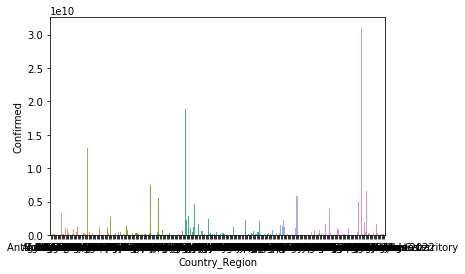

In [ ]:
contry_data = data_covid.groupby('Country_Region').sum()
# 2022-7-20일자 나라별 확진자/사망자/회복/발병률/치명률 몇개의 소수 국가가 높은 감염률을 갖고있음
sns.barplot(data = contry_data, x = contry_data.index, y = contry_data['Confirmed'])

In [ ]:
data_covid.corr()['Confirmed'].sort_values(ascending=False).reset_index()[1:].style.bar(align='mid')

,index,Confirmed
1,Recovered,0.810927
2,Deaths,0.778797
3,Active,0.607476
4,Incident_Rate,0.056380
5,Case_Fatality_Ratio,-0.002695
6,FIPS,-0.054678


In [ ]:
# column - Lastupdate를 타임값으로 변경해주고, 연도값으로 변경
data_covid['Last_Update'] = pd.to_datetime(data_covid['Last_Update'])
data_covid['Last_Update'] = data_covid['Last_Update'].dt.strftime("%Y-%m-%d")


# 결측치 0으로 대체
data_covid.loc[data_covid['Deaths'] != data_covid['Deaths'], 'Deaths'] = 0
data_covid.loc[data_covid['Confirmed'] != data_covid['Confirmed'], 'Confirmed'] = 0
data_covid.loc[data_covid['Recovered'] != data_covid['Recovered'], 'Recovered'] = 0


#결측치가 너무 많거나, 중복내용, 상관없는 내용 drop
data_covid = data_covid.drop('Province_State', axis=1)
data_covid = data_covid.drop('Admin2', axis=1)
data_covid= data_covid.drop('Active', axis =1)
data_covid = data_covid.drop('FIPS', axis = 1)
data_covid = data_covid.drop('Combined_Key', axis =1)


# 결측치 다른값으로 대체
data_covid['Combined_Key'] = data_covid['Country_Region']
data_covid['Case_Fatality_Ratio'] = data_covid['Deaths'] / (data_covid['Confirmed'] / 100)
data_covid.loc[data_covid['Case_Fatality_Ratio'] != data_covid['Case_Fatality_Ratio'], 'Case_Fatality_Ratio'] = 0
data_covid['Incident_Rate'] = data_covid['Incident_Rate']/100

In [ ]:
#Country_Region과 last update 가 겹치는 나라로 겹침
data_as = data_covid.groupby(['Country_Region', 'Last_Update']).sum()

In [ ]:
# data_as 로 dataframe 만들어준후 index reset
data_as = pd.DataFrame(data_as)
data_as = data_as.reset_index()


#Incident_Rate 다시 계산
data_as['Incident_Rate'] = data_as['Incident_Rate']/100

#Case_Fatality_Ratio 다시 계산
data_as['Case_Fatality_Ratio'] = data_as['Deaths'] / (data_as['Confirmed'] / 100)


#Case_Fatality_Ratio에 INF나 -inf값 제거
# data_as[data_as['Case_Fatality_Ratio'] == np.float('Inf')]
# data_as[data_as['Case_Fatality_Ratio'] == np.float('-Inf')]
data_as = data_as.drop(index = 144015, axis =0)


#Case_Fatality_Ratio결측치 0으로 대체
data_as.loc[data_as['Case_Fatality_Ratio'] != data_as['Case_Fatality_Ratio'], 'Case_Fatality_Ratio'] = 0


#data_as['Country_Region'].unique()확인
data_as['Country_Region'].unique()

#한국은 = Korea, South,  Republic of Korea, South Korea
korea = ['Korea, South',  'Republic of Korea', 'South Korea']

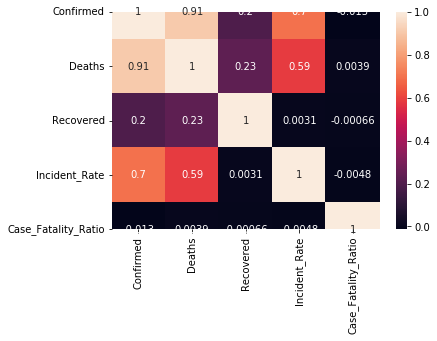

In [ ]:
sns.heatmap(data_as.corr(),annot = True)

In [ ]:
# data_as['Case_Fatality_Ratio'].max() - 6
data_as['Case_Fatality_Ratio'].mean()

2.4772386160754234

# **함수 정의**

In [ ]:
#함수 만들기
def train_test_Split(df):
    test = df[df['Country_Region'].isin(korea)]
    a = test.index
    train = df.drop(index = a, axis = 0)
    return train, test

def train_val_Split(df, size):
    train, val = train_test_split(df, train_size=size)
    return train, val


def feature_Split(df,target):
    features = df.columns.drop([target])
    X = df[features]
    y = df[target]
    return X, y

def evaluate(title, y, y_):
    mae = mean_absolute_error(y, y_)
    rmse = mean_squared_error(y, y_)**0.5
    r2 = r2_score(y, y_)
    print('*{} Result*'.format(title))
    print('='*50)
    print('MAE Score: $', mae)
    print('RMSE Score: $', rmse)
    print('R2 Score: ', r2)
    print()

def train_test_Split1(df, size):
    train, test = train_test_split(df, train_size=size)
    return train, test

def randcv(estimator, params):
    randcv = RandomizedSearchCV(estimator=estimator,
                                param_distributions=params,
                                n_iter=5,
                                scoring='neg_root_mean_squared_error',
                                cv=3,
                                random_state=33,
                                n_jobs=-1)

    tt = TransformedTargetRegressor(regressor=randcv,
                                func=np.log1p, inverse_func=np.expm1)

    tt.fit(X_train_std, y_train)
    y_pred = tt.predict(X_test_std)

    print('Best Params: ', tt.regressor_.best_params_)
    evaluate(estimator.__class__.__name__, y_test, y_pred)

    return tt.regressor_.best_estimator_

def gridcv(estimator, params):
    gridcv = GridSearchCV(estimator=estimator,
                          param_grid=params,
                          scoring='neg_root_mean_squared_error',
                          cv=3,
                          n_jobs=-1)

    tt = TransformedTargetRegressor(regressor=gridcv,
                                func=np.log1p, inverse_func=np.expm1)

    tt.fit(X_train_std, y_train)
    y_pred = tt.predict(X_test_std)

    print('Best Params: ', tt.regressor_.best_params_)
    evaluate(estimator.__class__.__name__, y_test, y_pred)
    
    return tt.regressor_.best_estimator_

def show_permutation_importance1(model):
    prm_imps = PermutationImportance(model,
                                    scoring='neg_root_mean_squared_error',
                                    n_iter=5,
                                    random_state=33)

    prm_imps.fit(X_train1, y_train1)
    print('{} Permutation Importance'.format(model.__class__.__name__))
    display(eli5.show_weights(
        prm_imps,
        top=None,
        feature_names=X_train.columns.to_list()
    ))

def show_permutation_importance(model):
    prm_imps = PermutationImportance(model,
                                    scoring='neg_root_mean_squared_error',
                                    n_iter=5,
                                    random_state=33)

    prm_imps.fit(X_train_std, y_train)
    print('{} Permutation Importance'.format(model.__class__.__name__))
    display(eli5.show_weights(
        prm_imps,
        top=None,
        feature_names=X_train.columns.to_list()
    ))

def draw_pdp_plot(feature, model, X_val, num_grid_points = 10):
    isolated = pdp_isolate(
        model=model,
        dataset=X_val,
        model_features=X_val.columns,
        feature=feature,
        grid_type='percentile',
        num_grid_points=num_grid_points
    )
    pdp.pdp_plot(isolated, feature)

def draw_pdp_interaction(model, features, X_test, plot_type):
    interaction = pdp_interact(
        model=model, 
        dataset=X_test,
        model_features=X_test.columns, 
        features=features
    )
    pdp_interact_plot(interaction, plot_type=plot_type, feature_names=features)
    plt.show()

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))
    
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
    ftr_top = ftr_importances.sort_values(ascending=False)
    return ftr_top

def visualize_ftr_importances(models):
    fig, axs = plt.subplots(figsize=(17,6), nrows=1, ncols=3)
    fig.tight_layout() 
    for i_num, model in enumerate(models):
        ftr_top = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=20)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(12)
        sns.barplot(x=ftr_top.values, y=ftr_top.index , ax=axs[i_num])
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.8, 
                    hspace=0.4)

# **인구 모델**

In [ ]:
#train/ test /val 나누기
target = 'korea'
train1 = df_age_population
test1 = df_total_population
train1, val1 = train_test_Split1(train1, 0.8)

#X /y 나누기 'Confirmed' = target
X_train1, y_train1 = feature_Split(df_total_population,'korea') 
X_val1, y_val1 = feature_Split(train1,'korea') 
X_test1, y_test1 = feature_Split(test1,'korea') 

In [ ]:
#Log Transformed Linear Regression
pipe_lin = make_pipeline(
    StandardScaler(),
    LinearRegression(n_jobs=-1)
)

tt_lin = TransformedTargetRegressor(regressor=pipe_lin,
                                func=np.log1p, inverse_func=np.expm1)

tt_lin.fit(X_train1, y_train1)
y_pred1 = tt_lin.predict(X_test1)
evaluate('Log Transformed Linear Regression', y_test1, y_pred1)


#Ridge
pipe_ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.arange(100, 105, 0.01), cv=5)
)

tt_ridge = TransformedTargetRegressor(regressor=pipe_ridge,
                                func=np.log1p, inverse_func=np.expm1)

tt_ridge.fit(X_train1, y_train1)
y_pred1 = tt_ridge.predict(X_test1)
print('Best alpha: ', tt_ridge.regressor_.named_steps['ridgecv'].alpha_)
evaluate('Log Transformed Ridge', y_test1, y_pred1)


#Lasso
pipe_lasso = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=np.arange(0, 0.2, 0.001), cv=5, random_state=33)
)

tt_lasso = TransformedTargetRegressor(regressor=pipe_lasso,
                                func=np.log1p, inverse_func=np.expm1)

tt_lasso.fit(X_train1, y_train1)
y_pred1 = tt_lasso.predict(X_test1)
print('Best alpha: ', tt_lasso.regressor_.named_steps['lassocv'].alpha_)
evaluate('Log Transformed Lasso', y_test1, y_pred1)


#ElasticNet
pipe_elnet = make_pipeline(
    StandardScaler(),
    ElasticNetCV(n_jobs=-1, cv=5, random_state=33)
)

tt_elnet = TransformedTargetRegressor(regressor=pipe_elnet,
                                func=np.log1p, inverse_func=np.expm1)

tt_elnet.fit(X_train1, y_train1)
y_pred1 = tt_elnet.predict(X_test1)
evaluate('Log Transformed ElasticNet', y_test1, y_pred1)

*Log Transformed Linear Regression Result*
MAE Score: $ 537.3122765525918
RMSE Score: $ 684.6342130841298
R2 Score:  0.9999992684869135

Best alpha:  100.0
*Log Transformed Ridge Result*
MAE Score: $ 57894.09679953099
RMSE Score: $ 72312.34658338473
R2 Score:  0.9918392548947721

Best alpha:  0.0
*Log Transformed Lasso Result*
MAE Score: $ 8150.667893945357
RMSE Score: $ 10338.205344009084
R2 Score:  0.9998332003205481

*Log Transformed ElasticNet Result*
MAE Score: $ 20848.684260712445
RMSE Score: $ 26741.632265025448
R2 Score:  0.998883957513313



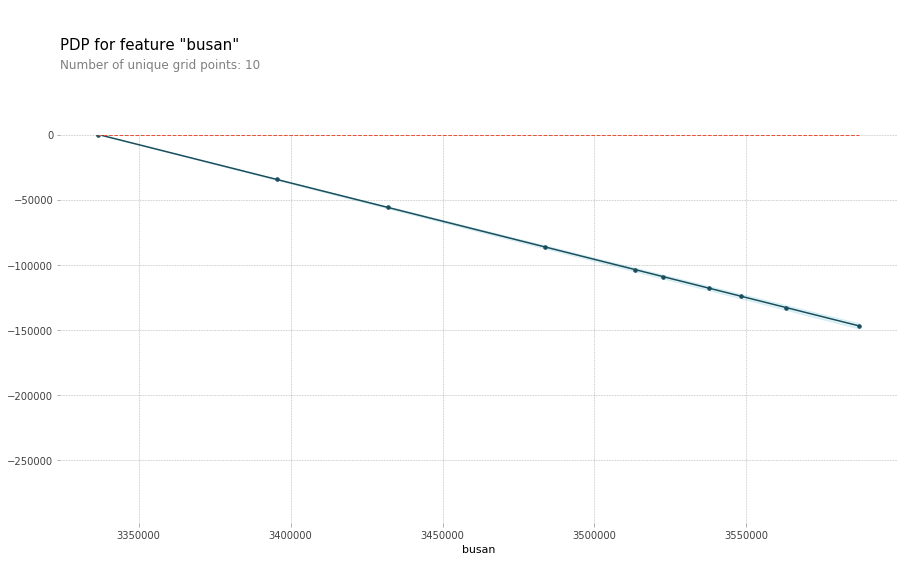

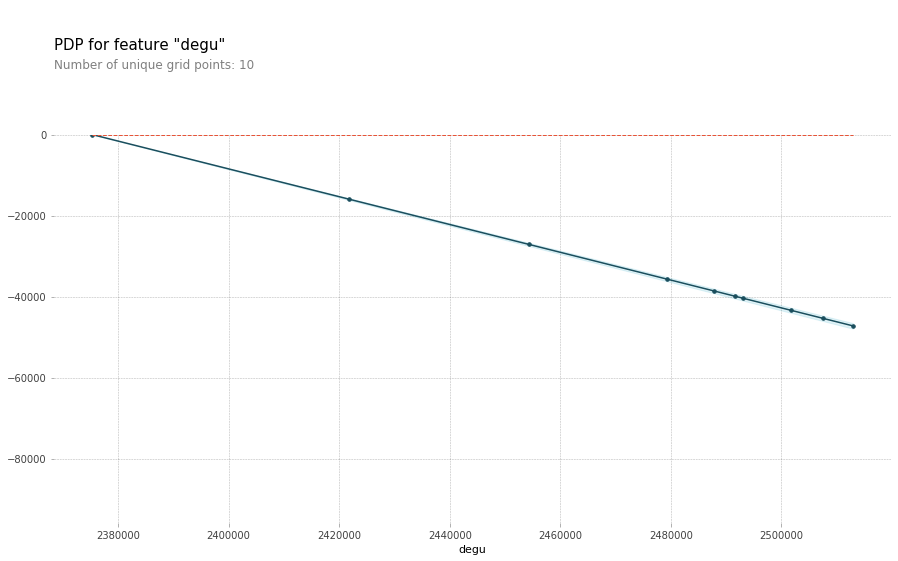

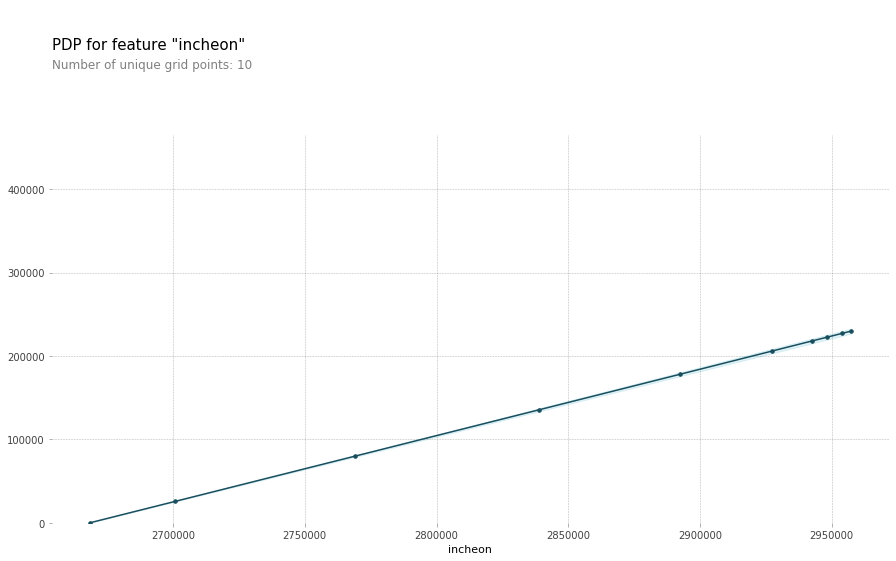

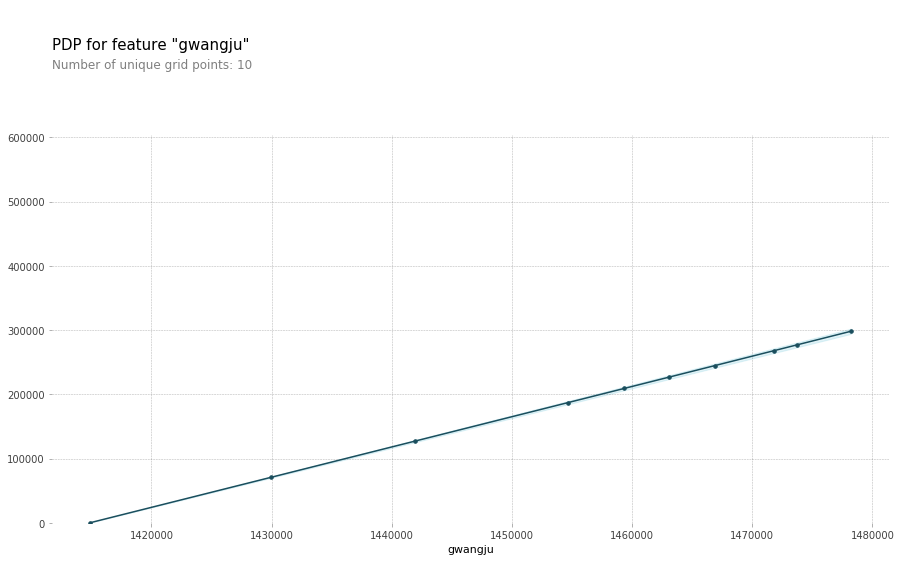

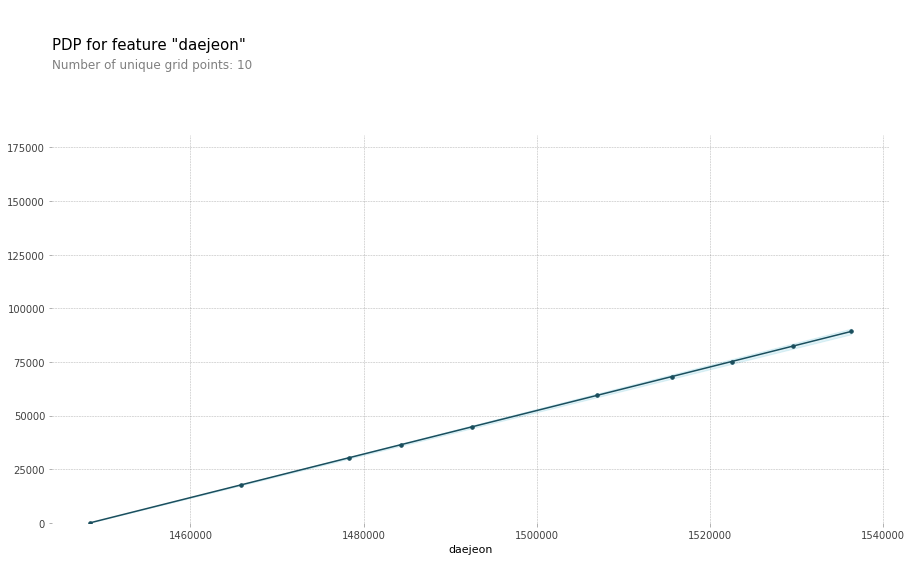

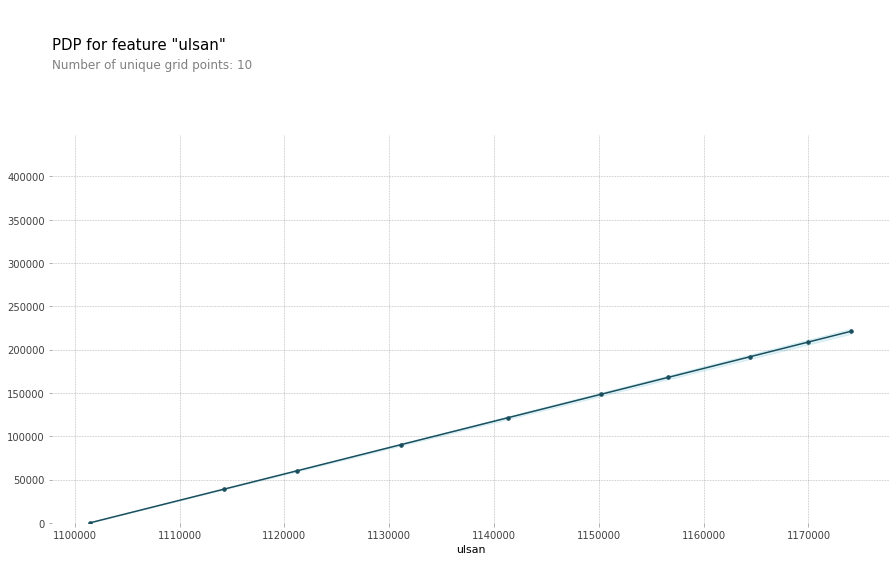

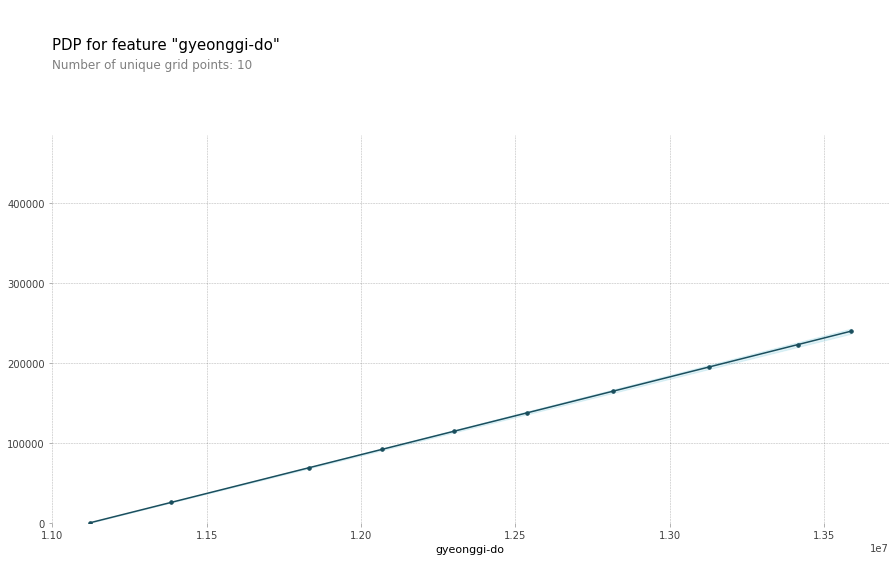

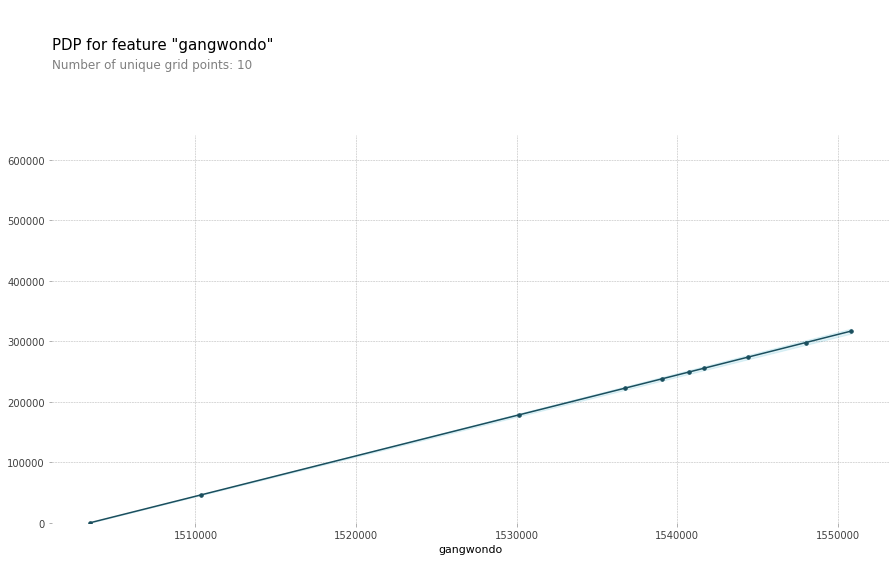

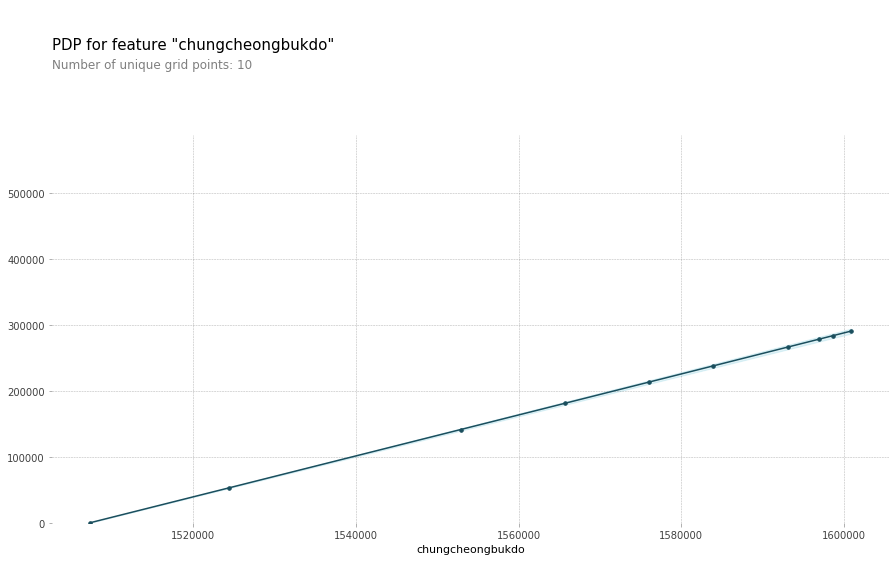

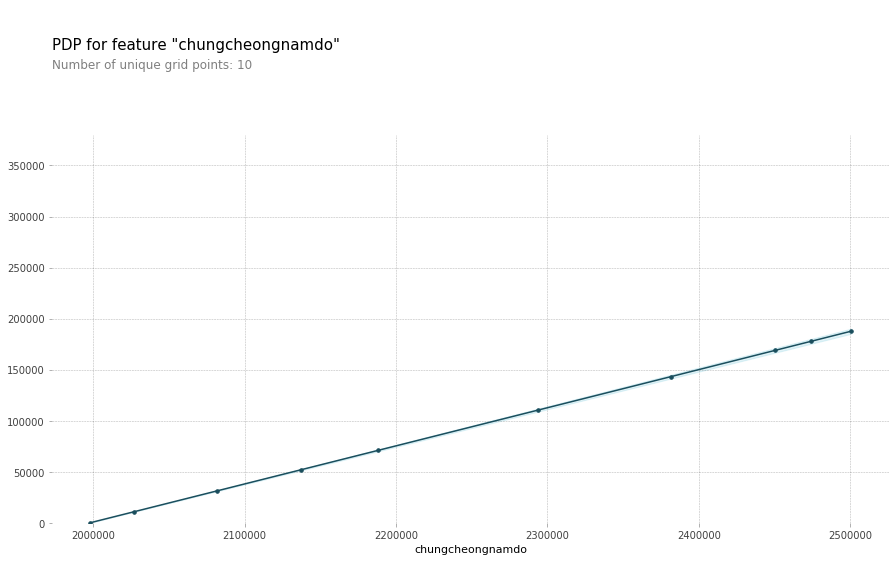

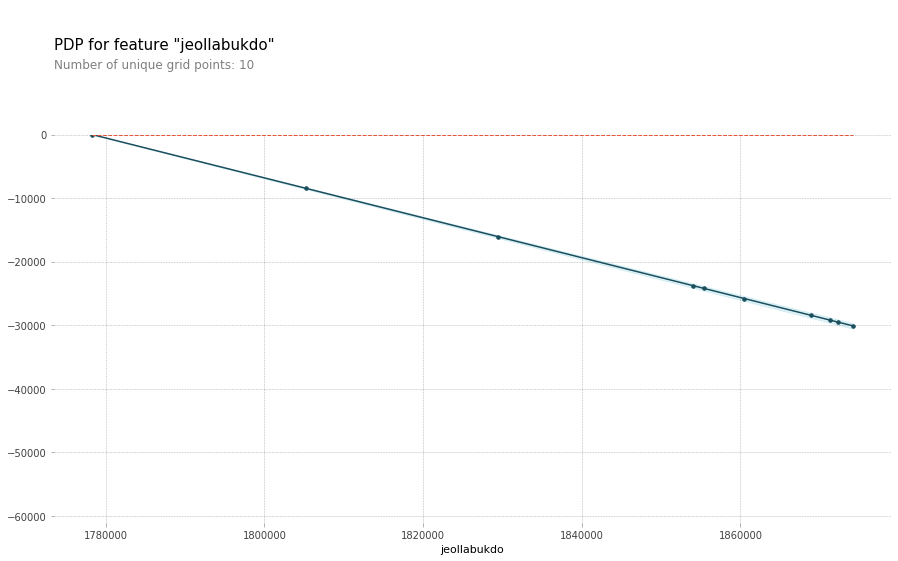

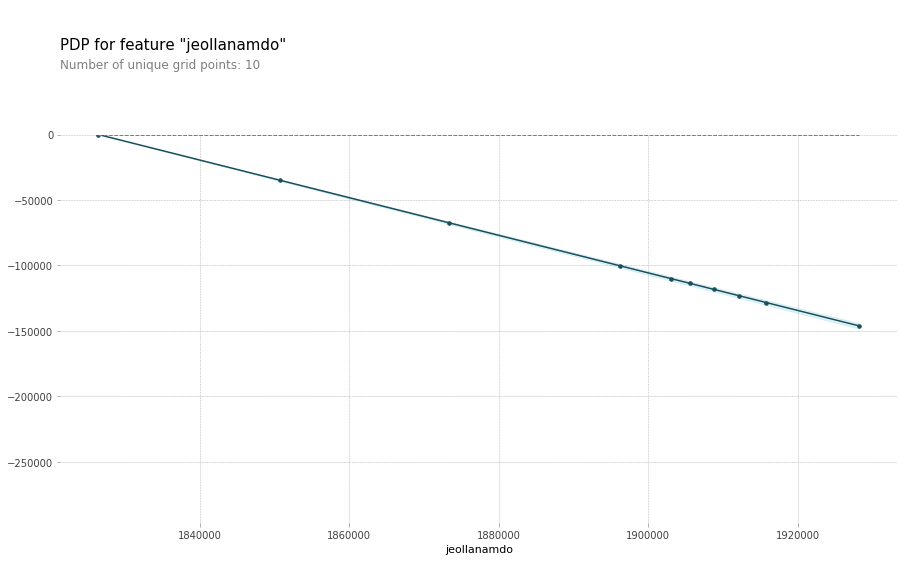

In [ ]:
#PDP feature 설정
features = X_train1.columns.tolist()[2:-1]
features


#PDP 를위한 X 합쳐주기
X = pd.concat((X_train1, X_test1))

#PDP 플로트
for i in range(12):
  draw_pdp_plot(features[i], tt_ridge, X)

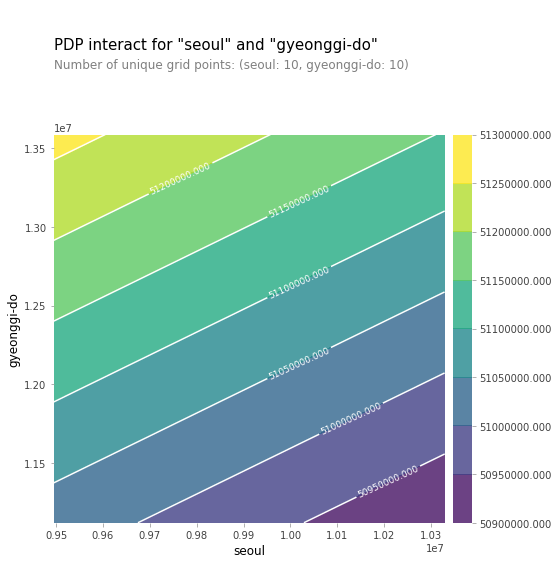

In [ ]:
#PDP 2개 플로트
features = ['seoul', 'gyeonggi-do']
draw_pdp_interaction(tt_ridge, features, X, 'contour')

# **코로나 모델**

In [ ]:
#train/ test /val 나누기
target = 'Confirmed'
train, test = train_test_Split(data_as)
train, val = train_val_Split(train, 0.8)

#X /y 나누기 'Confirmed' = target
X_train, y_train = feature_Split(data_as,'Confirmed') 
X_val, y_val = feature_Split(train,'Confirmed') 
X_test, y_test = feature_Split(test,'Confirmed') 


#Ordinal Endoder
encoder = OrdinalEncoder()
X_train_en = encoder.fit_transform(X_train)
X_val_en = encoder.fit_transform(X_val)
X_test_en = encoder.fit_transform(X_test)


#Standard scaler
std_scale = StandardScaler()
std_scale.fit(X_train_en)
X_train_std = std_scale.transform(X_train_en)
X_val_std = std_scale.transform(X_val_en)
X_test_std = std_scale.transform(X_test_en)

In [ ]:
#XGB Regressor
pipe_xgb = make_pipeline(
    StandardScaler(),
    XGBRegressor(learning_rate=0.1,
                  n_estimators=500,
                  n_jobs=-1,
                  random_state=33)
)

tt_xgb = TransformedTargetRegressor(regressor=pipe_xgb,
                                func=np.log1p, inverse_func=np.expm1)

tt_xgb.fit(X_train_std, y_train)
y_pred = tt_xgb.predict(X_test_std)
evaluate('Log Transformed XGB Regressor', y_test, y_pred)


#Light Gradient Boost Machine Regressor
pipe_lgb = make_pipeline(
    StandardScaler(),
    LGBMRegressor(learning_rate=0.1,
                  n_estimators=500,
                  n_jobs=-1,
                  random_state=33)
)

tt_lgb = TransformedTargetRegressor(regressor=pipe_lgb,
                                func=np.log1p, inverse_func=np.expm1)

tt_lgb.fit(X_train_std, y_train)
y_pred = tt_lgb.predict(X_test_std)
evaluate('Log Transformed Light GBM Regressor', y_test, y_pred)


# Random forest
pipe_rfreg = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=33)
)

tt_rfreg = TransformedTargetRegressor(regressor=pipe_rfreg,
                                func=np.log1p, inverse_func=np.expm1)

tt_rfreg.fit(X_train_std, y_train)
y_pred = tt_rfreg.predict(X_test_std)
evaluate('Log Transformed RandomForest Regressor', y_test, y_pred)

[00:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
*Log Transformed XGB Regressor Result*
MAE Score: $ 528528.4997747143
RMSE Score: $ 1356609.0890556923
R2 Score:  0.9479121685575609

*Log Transformed Light GBM Regressor Result*
MAE Score: $ 453705.8944030764
RMSE Score: $ 1176314.0129550786
R2 Score:  0.9608372325909513

*Log Transformed RandomForest Regressor Result*
MAE Score: $ 15669.162259635932
RMSE Score: $ 240313.1026557482
R2 Score:  0.9983655120119139



In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100,
                               n_jobs=-1,
                               random_state=33)

xgb_reg = XGBRegressor(n_estimators=100,
                       n_jobs=-1,
                       random_state=33,
                       seed=33)

lgb_reg = LGBMRegressor(n_estimators=100,
                        n_jobs=-1,
                        random_state=33)

In [ ]:
params_xgb = {
              'max_depth':[3], 
              'learning_rate':[0.001, 0.01, 0.1, 0.15], 
            }


# randcv(xgb_reg, params_xgb)
gridcv(xgb_reg, params_xgb)

xgb_reg = XGBRegressor(n_estimators=1000,
                       learning_rate=0.1,
                       max_depth=3,
                       n_jobs=-1,
                       random_state=33,
                       seed=33)

tt_xgb = TransformedTargetRegressor(regressor=xgb_reg,
                                func=np.log1p, inverse_func=np.expm1)


tt_xgb.fit(X_train_std, y_train,
        verbose=False,
        early_stopping_rounds=100,
        eval_set=[(X_test_std, y_test)],
        eval_metric='rmse')
y_pred = tt_xgb.predict(X_test_std)
evaluate('Log Transformed XGB Regressor for Training Set', y_train, tt_xgb.predict(X_train_std))
evaluate('Log Transformed XGB Regressor for Test Set', y_test, y_pred)

In [ ]:
params_lgb = {
              'num_leaves':[29], 
              'max_depth':[-1], 
              'learning_rate':[0.1], 
              }


# randcv(lgb_reg, params_lgb)
gridcv(lgb_reg, params_lgb)

lgb_reg = LGBMRegressor(n_estimators=1000,
                        num_leaves=11,
                        max_depth=-1,
                        learning_rate=0.271,
                        reg_alpha=0.0003,
                        reg_lambda=1.2,
                        n_jobs=-1,
                        objective='regression',
                        random_state=33)

tt_lgb = TransformedTargetRegressor(regressor=lgb_reg,
                                func=np.log1p, inverse_func=np.expm1)


tt_lgb.fit(X_train_std, y_train,
        verbose=False,
        early_stopping_rounds=100,
        eval_set=[(X_test_std, y_test)],
        eval_metric='rmse')
y_pred = tt_lgb.predict(X_test_std)
evaluate('Log Transformed Light GBM Regressor for Training Set', y_train, tt_lgb.predict(X_train_std))
evaluate('Log Transformed Light GBM Regressor for Test Set', y_test, y_pred)

In [ ]:
params_rf = {'max_depth': [18], 
             'min_samples_split': [6], 
             'min_samples_leaf': [1]
             }


# randcv_rf = randcv(rf_reg, params_rf)
gridcv_rf = gridcv(rf_reg, params_rf)

pipe_rfreg = make_pipeline(
    # StandardScaler(),
    RandomForestRegressor(n_estimators=16,
                          min_samples_split=6,
                          min_samples_leaf=5,
                          max_depth=21, 
                          n_jobs=-1,
                          oob_score=True, 
                          random_state=33)
)


tt_rfreg = TransformedTargetRegressor(regressor=pipe_rfreg,
                                func=np.log1p, inverse_func=np.expm1)

tt_rfreg.fit(X_train_std, y_train)
y_pred = tt_rfreg.predict(X_test_std)
print('OOB Score: ', tt_rfreg.regressor_.named_steps['randomforestregressor'].oob_score_)
print('='*50)
evaluate('Log Transformed RandomForest Regressor for Training Set', y_train, tt_rfreg.predict(X_train_std))
evaluate('Log Transformed RandomForest Regressor for Test Set', y_test, y_pred)

Best Params:  {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 6}
*RandomForestRegressor Result*
MAE Score: $ 25006.837760827308
RMSE Score: $ 357384.1801607679
R2 Score:  0.9963850900713102

OOB Score:  0.9943167449399742
*Log Transformed RandomForest Regressor for Training Set Result*
MAE Score: $ 9975.054901899268
RMSE Score: $ 1490997.033905444
R2 Score:  0.9024047415819441

*Log Transformed RandomForest Regressor for Test Set Result*
MAE Score: $ 68499.3357530087
RMSE Score: $ 710433.9395963673
R2 Score:  0.9857151977139813



In [ ]:
# random forest feature importance
show_permutation_importance(tt_rfreg)

# xgb feature importance
show_permutation_importance(tt_xgb)

# lgbm regressor feature importance
show_permutation_importance(tt_lgb)

TransformedTargetRegressor Permutation Importance


Weight,Feature
5244658.8821 ± 35636.4963,Deaths
2115281.4816 ± 24879.4146,Case_Fatality_Ratio
104272.6784 ± 14455.5416,Last_Update
70807.0928 ± 734.9376,Incident_Rate
816.8451 ± 6.0493,Recovered
283.4580 ± 52.5439,Country_Region


TransformedTargetRegressor Permutation Importance


Weight,Feature
1204441.0474 ± 5157.6672,Deaths
696618.3725 ± 14728.0335,Incident_Rate
186833.4445 ± 17350.3501,Case_Fatality_Ratio
72882.8792 ± 3146.1275,Last_Update
595.6219 ± 321.8259,Recovered
0 ± 0.0000,Country_Region


TransformedTargetRegressor Permutation Importance


Weight,Feature
6054632.6788 ± 249699.9080,Case_Fatality_Ratio
5086733.2558 ± 76146.5898,Deaths
625142.4953 ± 38866.6560,Incident_Rate
276071.0350 ± 36713.5445,Last_Update
62648.7006 ± 15034.0339,Country_Region
10423.2096 ± 2743.1734,Recovered


In [ ]:
xgb = tt_xgb.regressor_
lgbm = tt_lgb.regressor_
rf = tt_rfreg.regressor_.named_steps['randomforestregressor']

In [ ]:
X =  pd.concat((X_train_en, X_test_en))

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X.iloc[:100])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

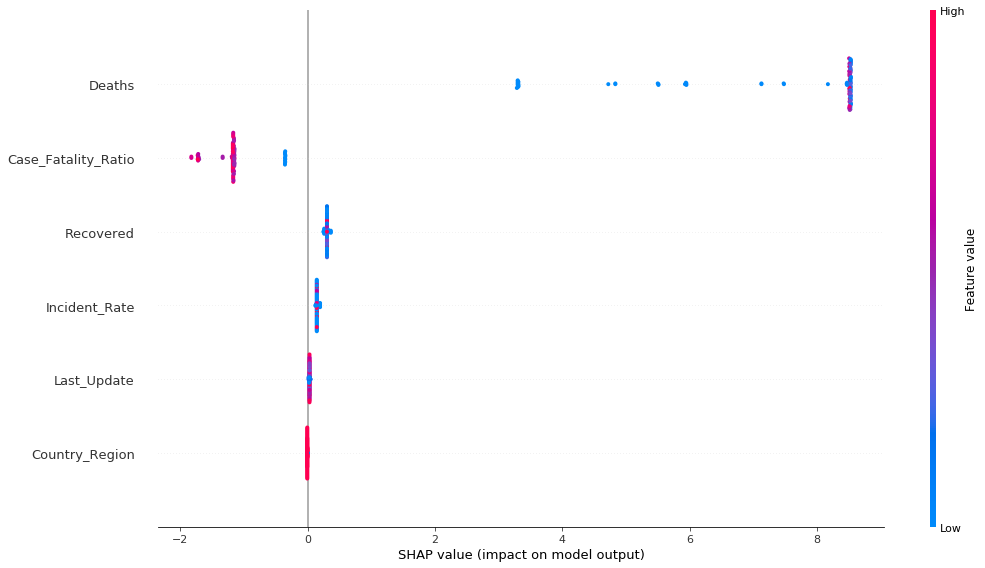

In [ ]:
shap.summary_plot(shap_values, X.iloc[:100], plot_size=(15,8))

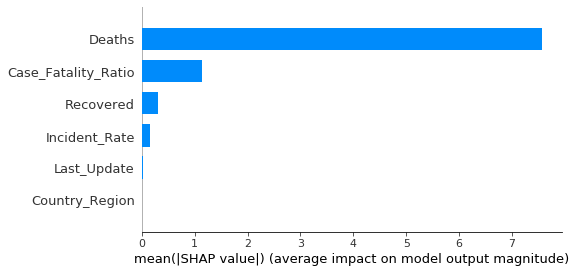

In [ ]:
shap.summary_plot(shap_values, X, plot_type='bar')

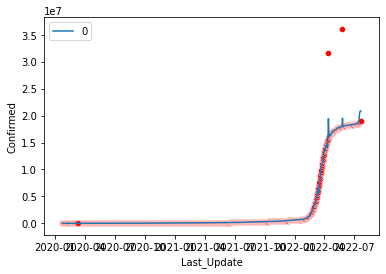

In [ ]:
#대한민국 코로나 그래프 플로팅
corona_pt= data_as[data_as['Country_Region'].isin(korea)]
corona_pt['Last_Update']  = pd.to_datetime(corona_pt['Last_Update'])
corona_pt = corona_pt['Last_Update']
corona_pt = pd.DataFrame(y_pred, corona_pt)
test['Last_Update'] = pd.to_datetime(test['Last_Update'])
sns.lineplot(data = corona_pt)
sns.scatterplot(x = 'Last_Update', y = 'Confirmed', data= test, color = 'red')

백신 접종률 그래프

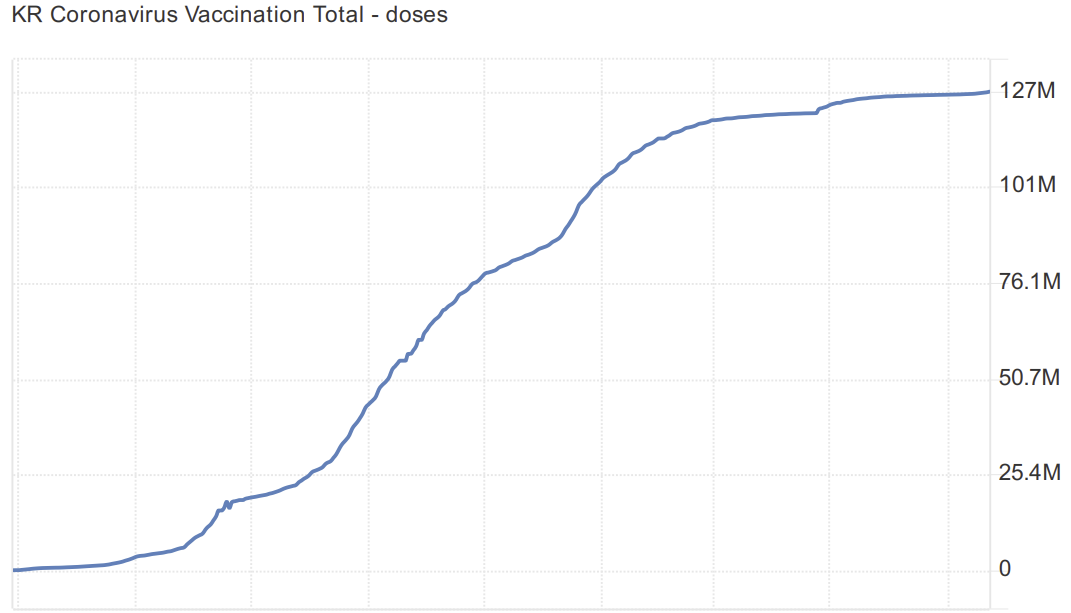

GDP대비 경상의료비 (OECD평균) = 9% 로 GDP대비 의료비가 낮게 소비되고 있는것으로 확인

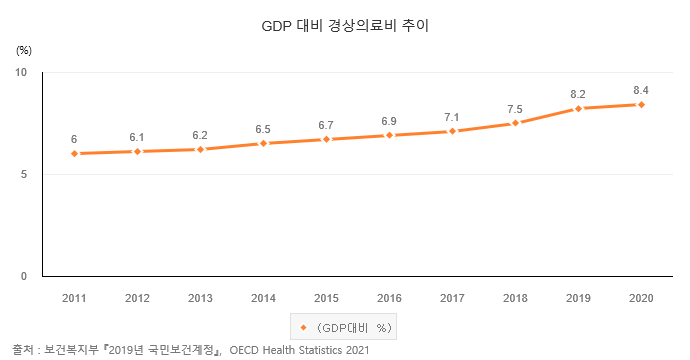

In [ ]:
##대한민국 인구 그래프 플로팅
a = pd.DataFrame(df_total_population['period_age_sex'])
b = pd.DataFrame(df_total_population['korea'])
c = pd.DataFrame(y_pred1)

population_pt = pd.concat([a,b], axis =1)
population_pt = population_pt.reset_index()
population_pt1 = pd.concat([population_pt,c], axis =1)
population_pt1 = population_pt1.drop('index', axis=1)
population_pt1.columns = ['period_age_sex',	'korea', 'pred']
population_pt1 = population_pt1.sort_values(by='period_age_sex')
# population_pt1 = population_pt1.astype('int')

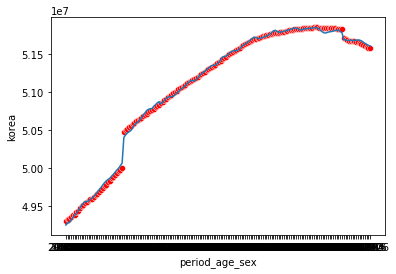

In [ ]:
sns.scatterplot(x = 'period_age_sex' , y = 'korea', data = population_pt1, color = 'red')
sns.lineplot(x = 'period_age_sex' , y = 'pred', data = population_pt1)

# **통계청 자료 정리**

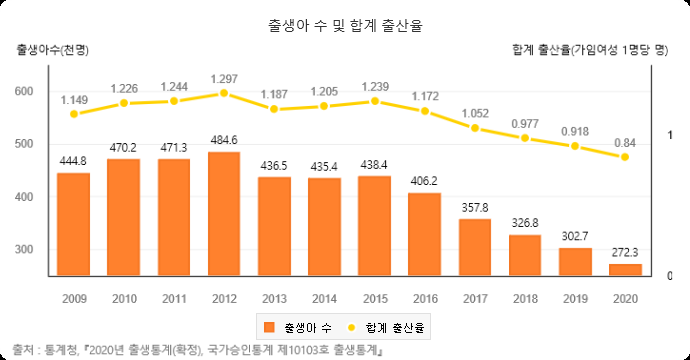

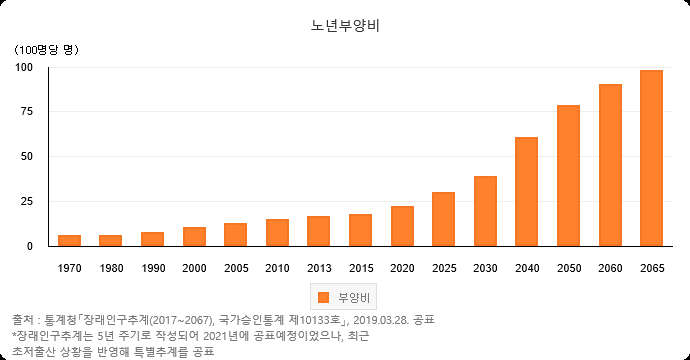

 □ (의학계열 졸업자) 21년 우리나라 의학계열(한의학 포함, 치의학 제외)졸업자는 인구 10만 명당 7.4명으로 OECD 국가 중에서 일본(7.1명), 이스라엘(7.2명)에 이어서 세 번째로 적었다.

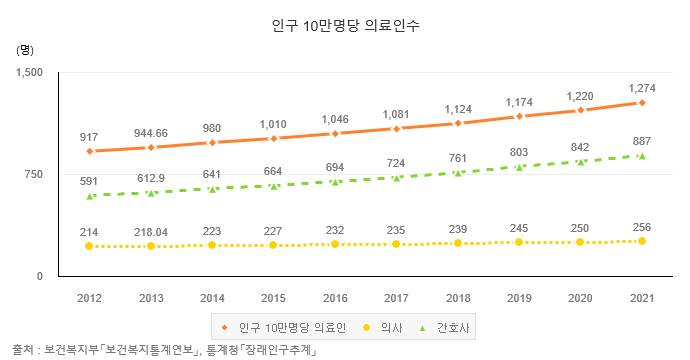

# **결론**

1. OECD 평균에 비해 의료 종사자 수 및 GDP당 의료비등 한국 의료체계에 허점이 드러나는데 우리나라 인구는 지속적으로 감소 및 출산률 저하로 인해 가속화 되어가고, 또한 노인의 인구 비율이 높아 지고있습니다.

    의료 종사자의 증가 추세 또한 출생률을 감안했을때, 언젠가 감소추세로 돌아설것으로 예상됩니다.

2. 코로나가 한번 크게 확산한 후 잠잠 한 시기를 거치고 있지만, 세계 추세를 보면 최근 다시 재확산하는 조짐이 보이고 있습니다. 또한 코로나의 예방접종이 코로나 감염을 막아주지는 못하는것으로 확인됩니다.

3. 코로나 혹은 다른 전염병이 다시 세계적으로 범유행 한다면, 코로나 초기와 같이 많은 인원의 의료 종사자들이 증가하고 있는 치명률 높은 노인에 대하여 완벽한 대처가 이뤄지기 어려워 사망자가 늘어날 우려가 있고, 그 때의 의료 종사자들의 과로로 인한 의료 체계의 도미노 효과로 큰 위험을 가져오게 될 수도 있습니다.